<a href="https://colab.research.google.com/github/oheckmann/Cloud/blob/main/homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import torch

from torchvision import transforms

from PIL import Image

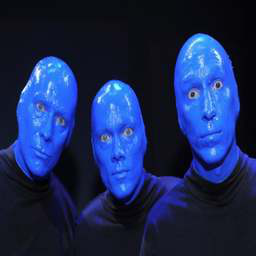

In [167]:
blue = Image.open("drive/MyDrive/images/bluemen_256x256.jpg")
blue

In [168]:
convert_tensor = transforms.ToTensor()
bluet = convert_tensor(blue)

In [169]:
bluet.mean()

tensor(0.1998)

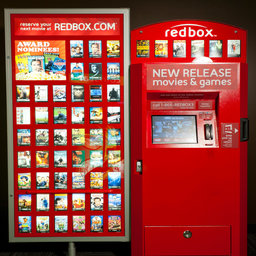

In [170]:
red = Image.open("drive/MyDrive/images/redbox_256x256.jpg")
red

In [171]:
convert_tensor = transforms.ToTensor()
redt = convert_tensor(red)
redt.mean()

tensor(0.3655)

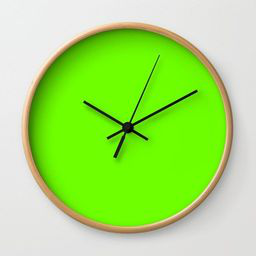

In [172]:
green = Image.open("drive/MyDrive/images/greenclock_256x256.jpg")
green

In [173]:
convert_tensor = transforms.ToTensor()
greent = convert_tensor(green)
greent.mean()

tensor(0.6608)

In [174]:
R_mean, G_mean ,B_mean = torch.mean(greent, dim = [1,2])
print(R_mean)
print(G_mean)
print(B_mean)

tensor(0.6519)
tensor(0.8869)
tensor(0.4434)


In [175]:
R_mean, G_mean ,B_mean = torch.mean(bluet, dim = [1,2])
print(R_mean)
print(G_mean)
print(B_mean)

tensor(0.1007)
tensor(0.1602)
tensor(0.3386)


In [176]:
R_mean, G_mean ,B_mean = torch.mean(redt, dim = [1,2])
print(R_mean)
print(G_mean)
print(B_mean)

tensor(0.5967)
tensor(0.2635)
tensor(0.2363)


In [177]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [178]:
def model(t_u, w1, w2, b):
  return w2 * t_u ** 2 + w1 * t_u + b

In [179]:
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

In [180]:
w1 = torch.ones(()) 
w2 = torch.ones(()) 
b = torch.zeros(())
t_p = model(t_u, w1, w2, b)
t_p

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])

In [181]:
loss = loss_fn(t_p, t_c)
loss

tensor(11709471.)

In [182]:
delta = 0.1
loss_rate_of_change_w = \
(loss_fn(model(t_u, w1 + delta, w2 + delta , b), t_c) -
loss_fn(model(t_u, w1 - delta, w2 - delta, b), t_c)) / (2.0 * delta)

In [183]:
learning_rate = 1e-2
w1 = w1 - learning_rate * loss_rate_of_change_w
w2 = w2 - learning_rate * loss_rate_of_change_w

In [184]:
loss_rate_of_change_b = \
(loss_fn(model(t_u, w1, w2, b + delta), t_c) -
loss_fn(model(t_u, w1, w2, b - delta), t_c)) / (2.0 * delta)
b = b - learning_rate * loss_rate_of_change_b

In [185]:
def dloss_fn(t_p, t_c):
  dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
  return dsq_diffs

In [186]:
def dmodel_dw(t_u, w1, w2, b):
  return t_u

In [187]:
def dmodel_db(t_u, w1, w2, b):
  return 1.0

In [188]:
def grad_fn(t_u, t_c, t_p, w1, w2, b):
  dloss_dtp = dloss_fn(t_p, t_c)
  dloss_dw1 = dloss_dtp * dmodel_dw(t_u, w1, w2, b)
  dloss_dw2 = dloss_dtp * dmodel_dw(t_u, w1, w2, b)
  dloss_db = dloss_dtp * dmodel_db(t_u, w1, w2, b)
  return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_db.sum()])


In [189]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    w1, w2, b = params
    t_p = model(t_u, w1, w2, b)
    loss = loss_fn(t_p, t_c)
    grad = grad_fn(t_u, t_c, t_p, w1, w2, b)
    params = params - learning_rate * grad
    if(epoch % 500 == 0):
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
  return params

In [190]:
training_loop(
  n_epochs = 5000,
  learning_rate = 1e-1,
  params = torch.tensor([1.0, 1.0, 0.0]),
  t_u = t_u,
  t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan])

In [191]:
training_loop(
n_epochs = 5000,
learning_rate = 1e-4,
params = torch.tensor([1.0, 1.0, 0.0]),
t_u = t_u,
t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan])

In [192]:
t_un = 0.1 * t_u

In [193]:
  paras1 = training_loop(
  n_epochs = 5000,
  learning_rate = 1e-1,
  params = torch.tensor([1.0, 1.0, 0.0]),
  t_u = t_un,
  t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


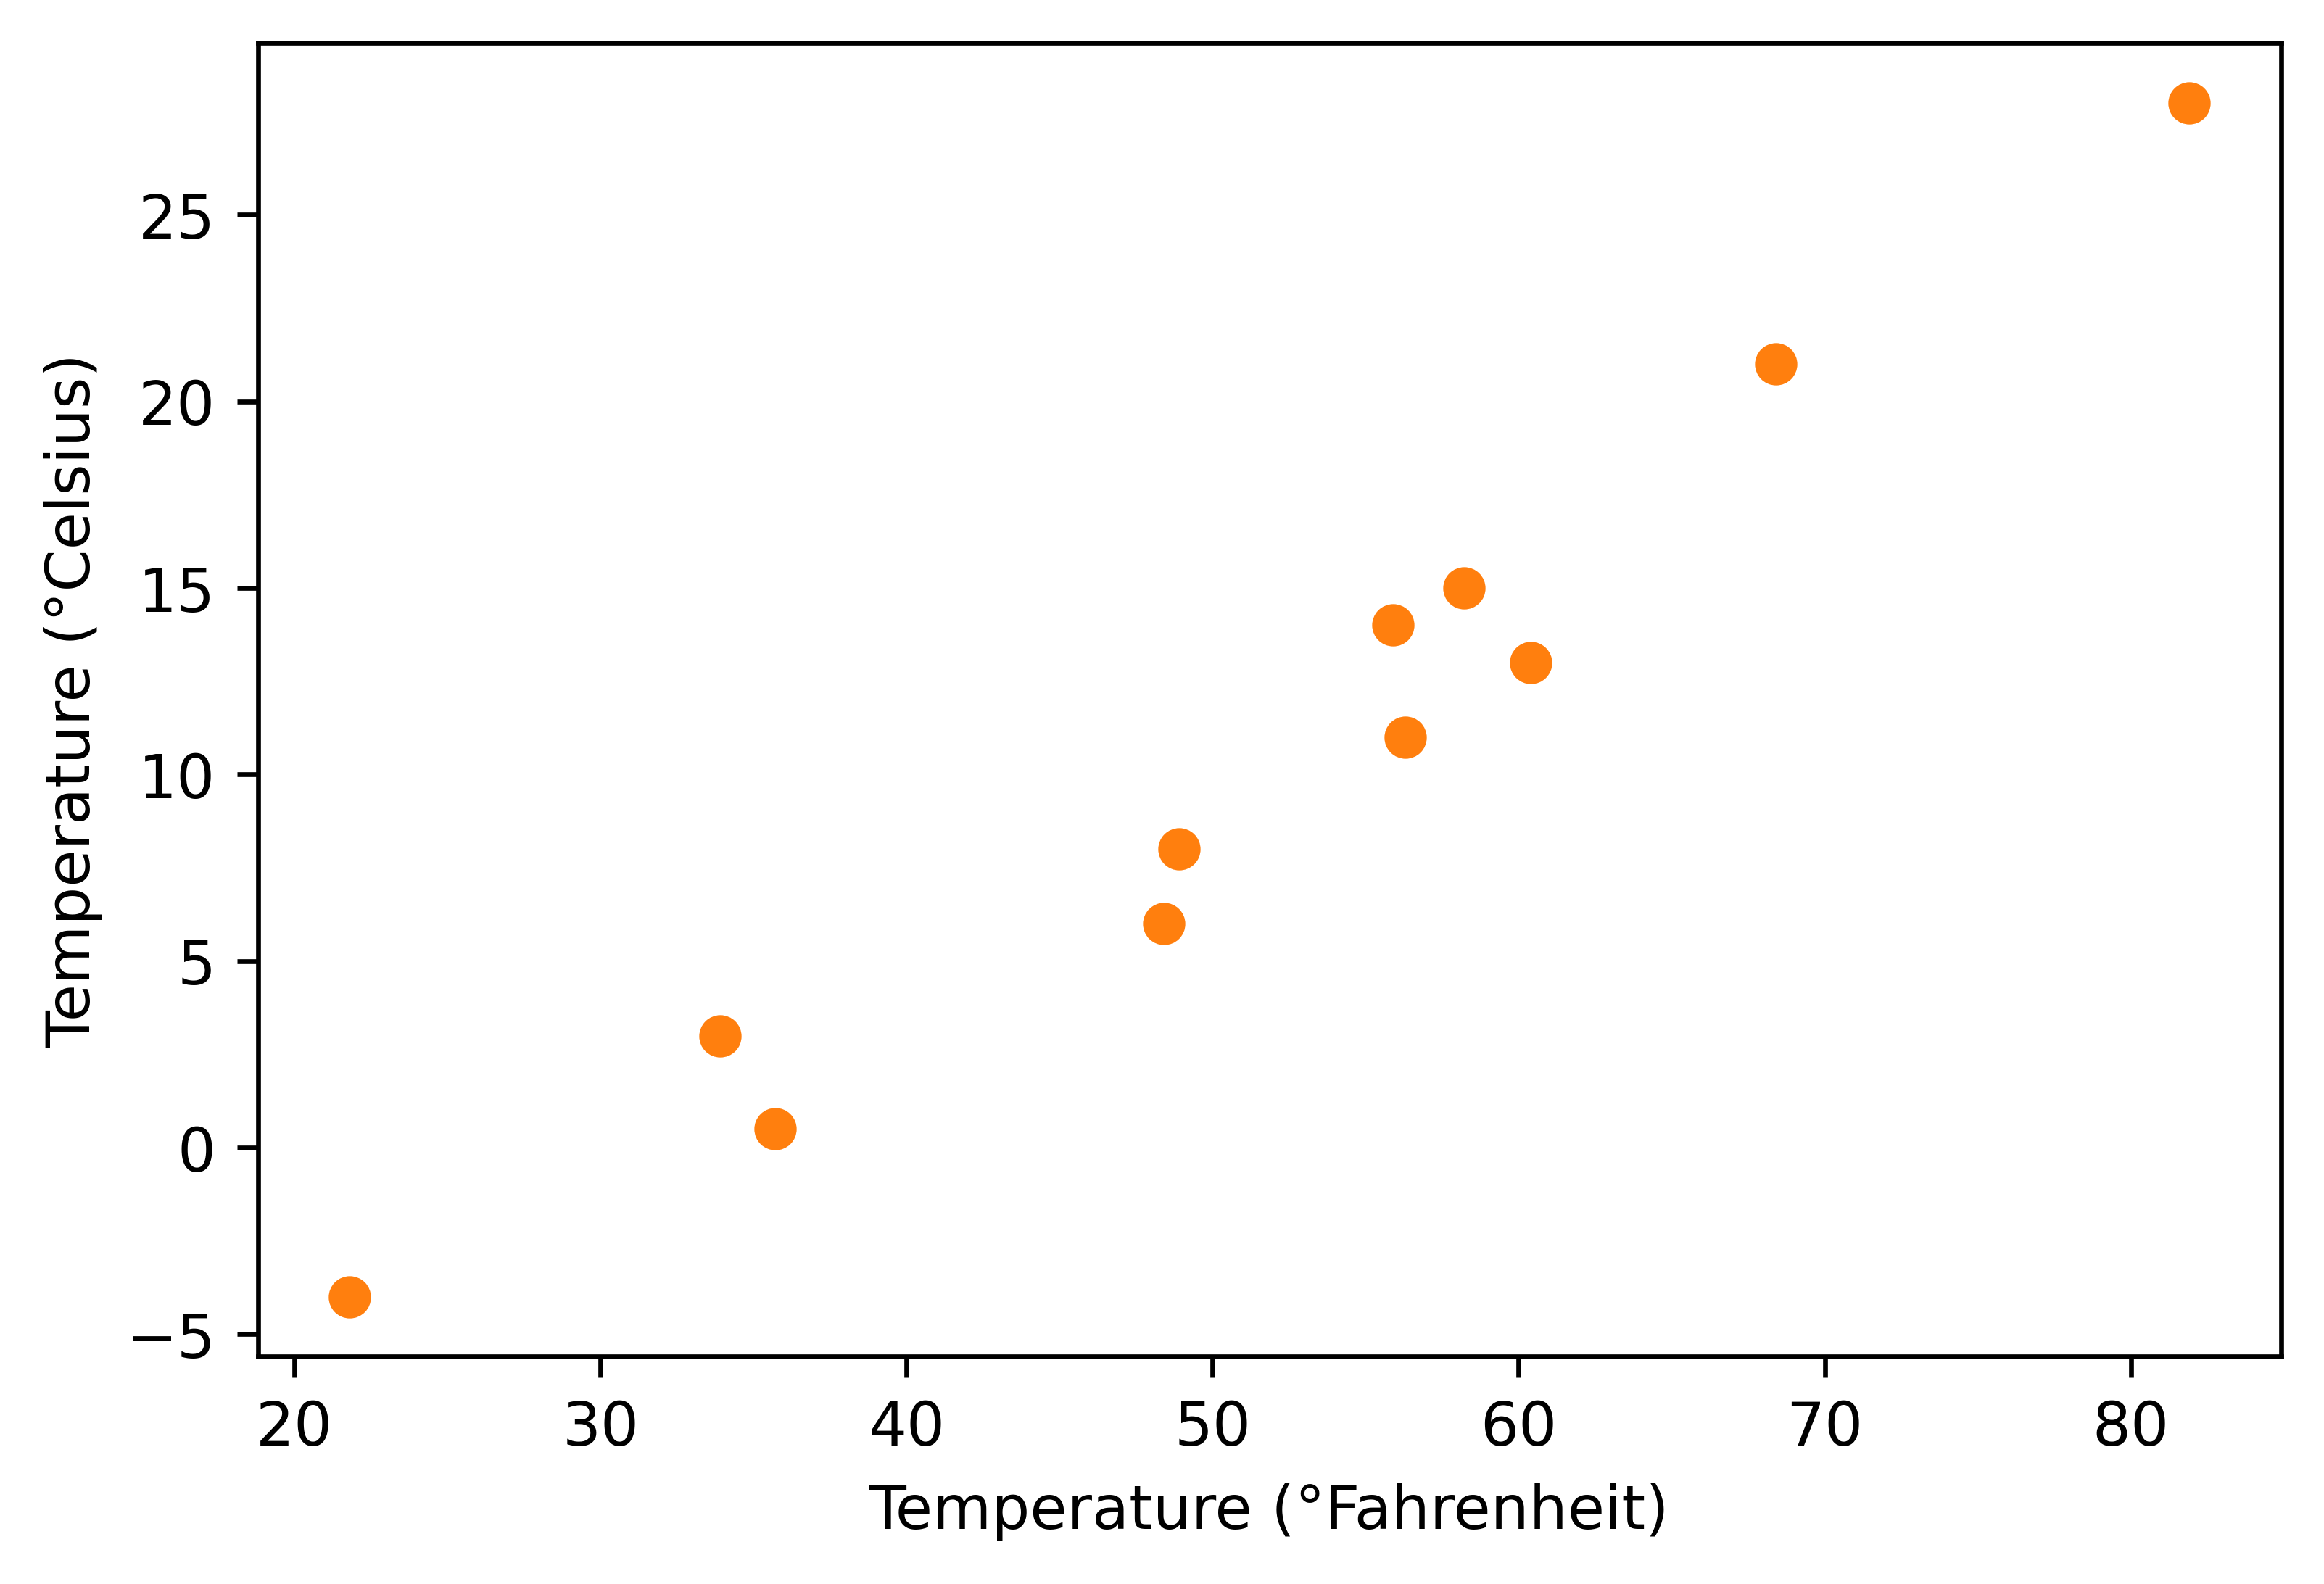

In [194]:
%matplotlib inline
from matplotlib import pyplot as plt
t_p1 = model(t_un, *paras1)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p1.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [195]:
  paras2 = training_loop(
  n_epochs = 5000,
  learning_rate = 1e-2,
  params = torch.tensor([1.0, 1.0, 0.0]),
  t_u = t_un,
  t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


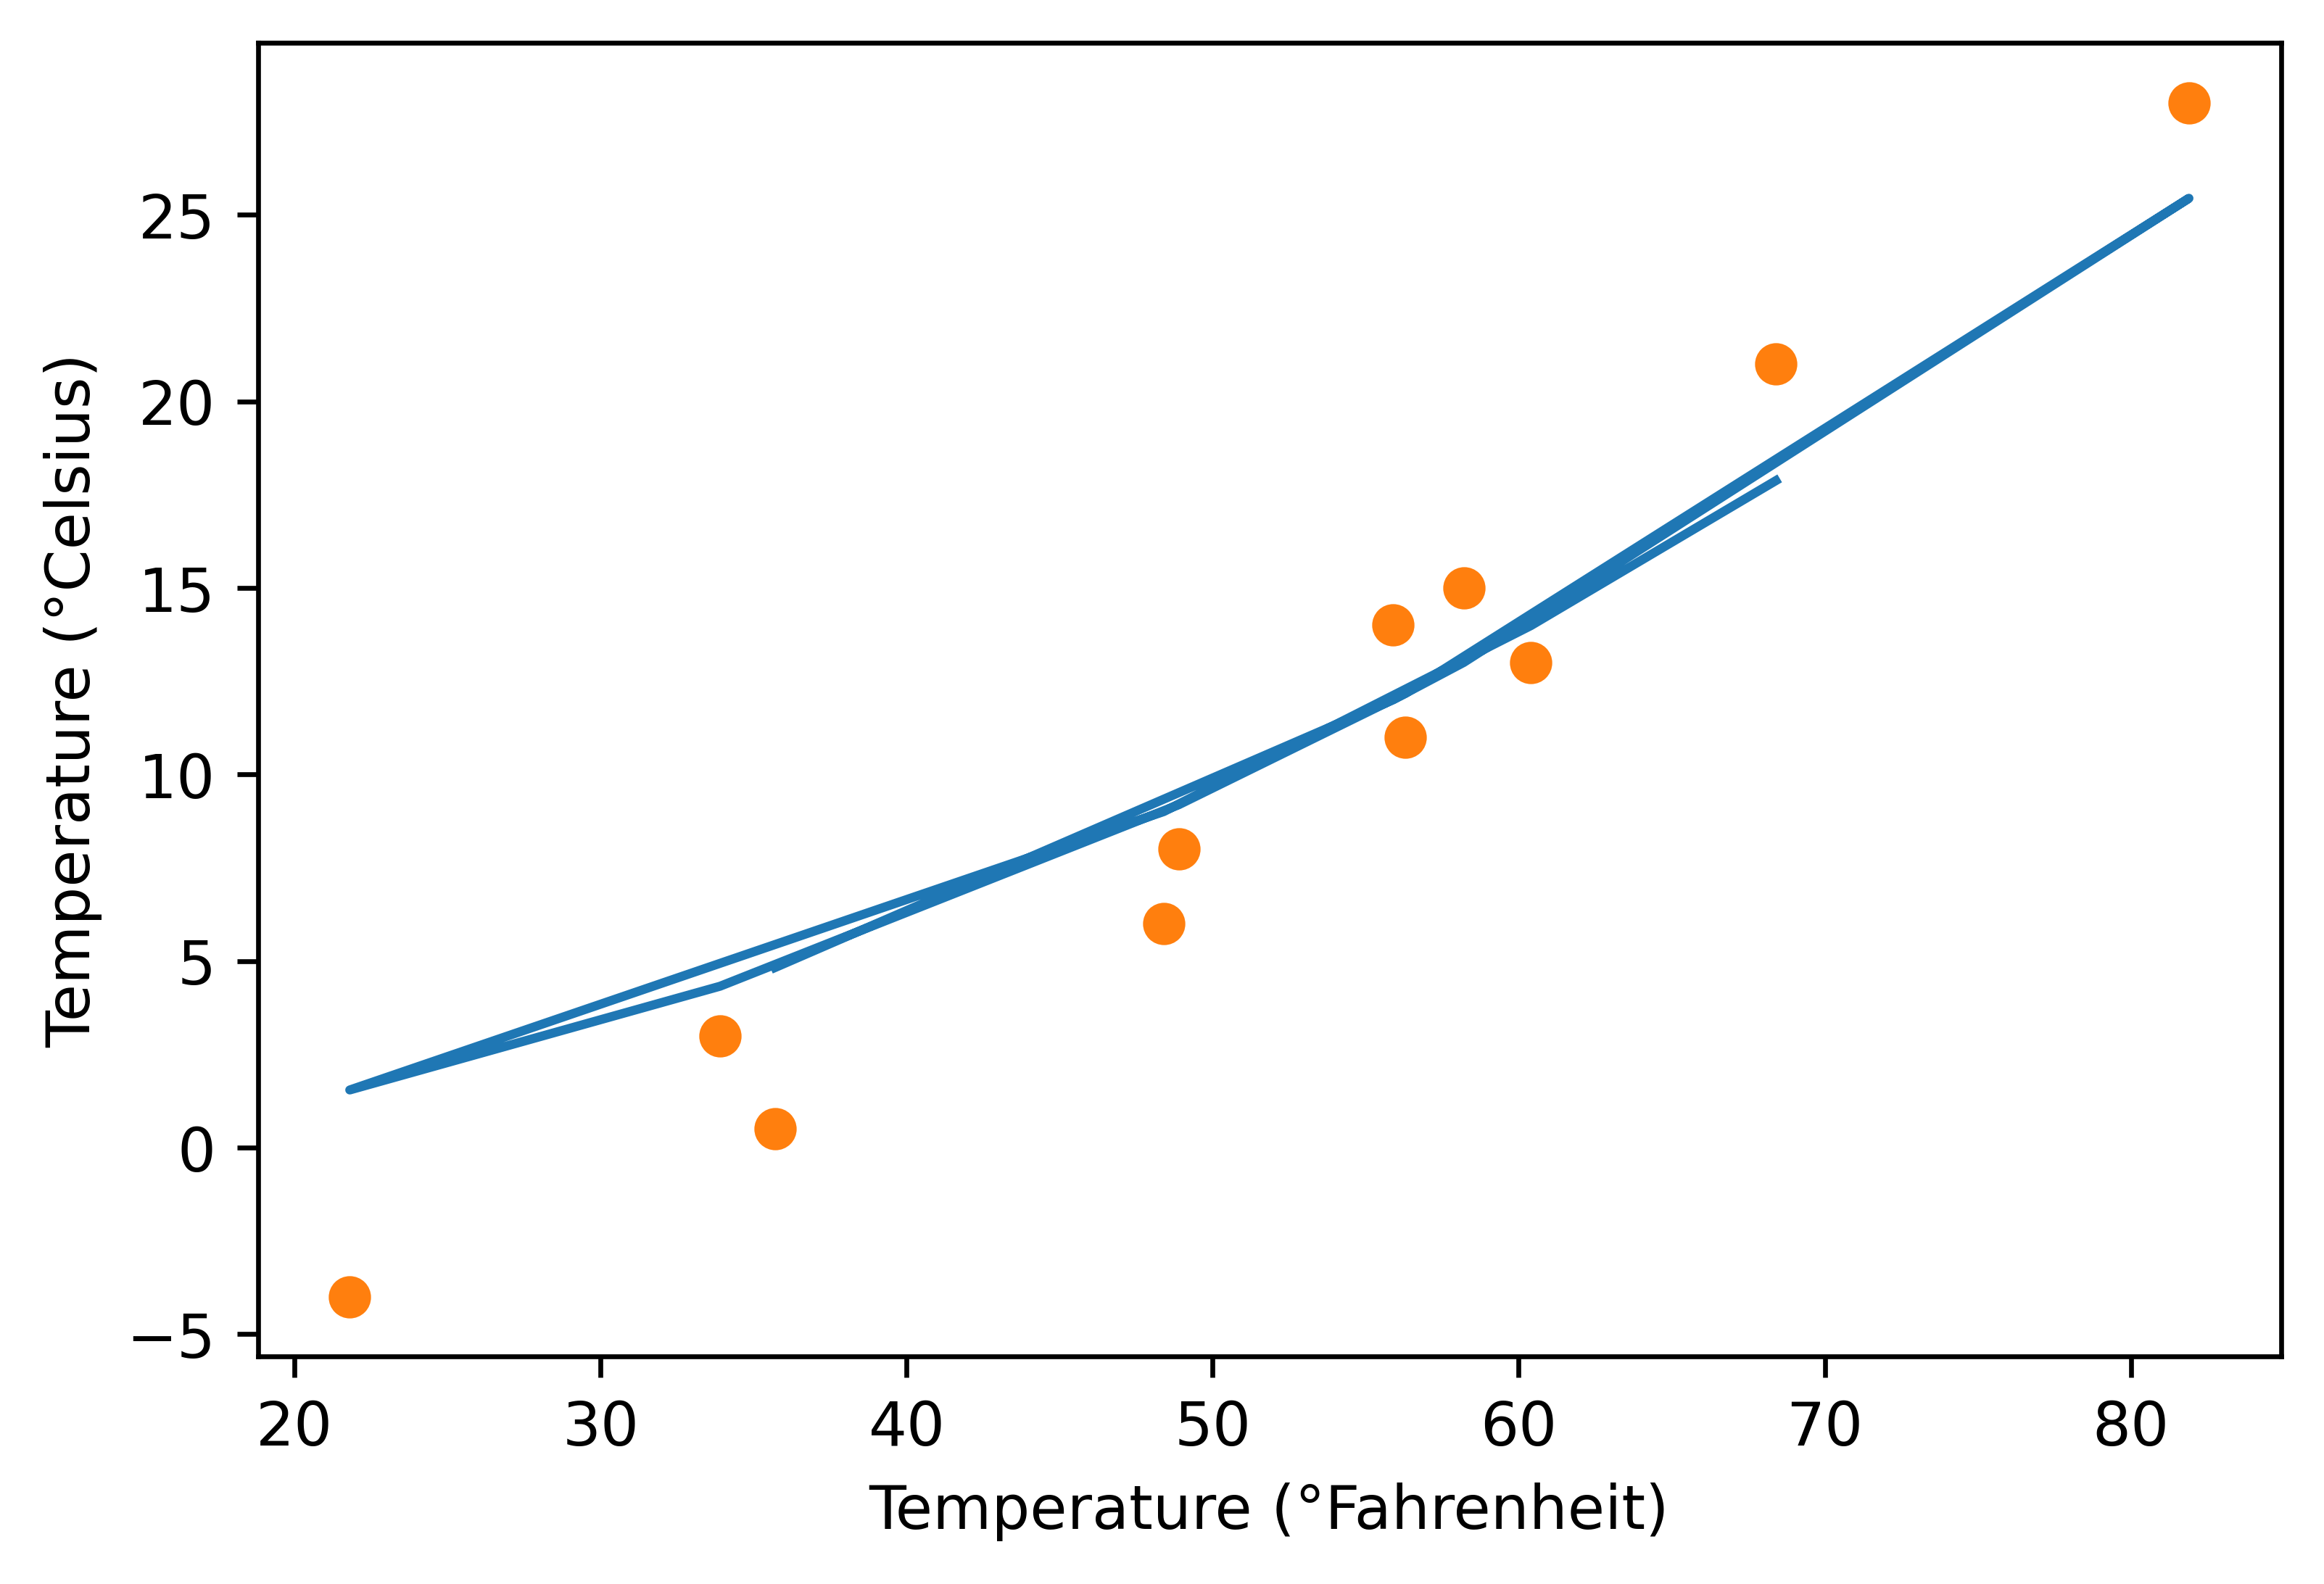

In [196]:
t_p2 = model(t_un, *paras)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p2.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [197]:
  paras3 = training_loop(
  n_epochs = 5000,
  learning_rate = 1e-3,
  params = torch.tensor([1.0, 1.0, 0.0]),
  t_u = t_un,
  t_c = t_c)

Epoch 500, Loss 8.035689
Epoch 1000, Loss 6.636409
Epoch 1500, Loss 5.582901
Epoch 2000, Loss 4.790622
Epoch 2500, Loss 4.195589
Epoch 3000, Loss 3.749397
Epoch 3500, Loss 3.415423
Epoch 4000, Loss 3.165985
Epoch 4500, Loss 2.980155
Epoch 5000, Loss 2.842138


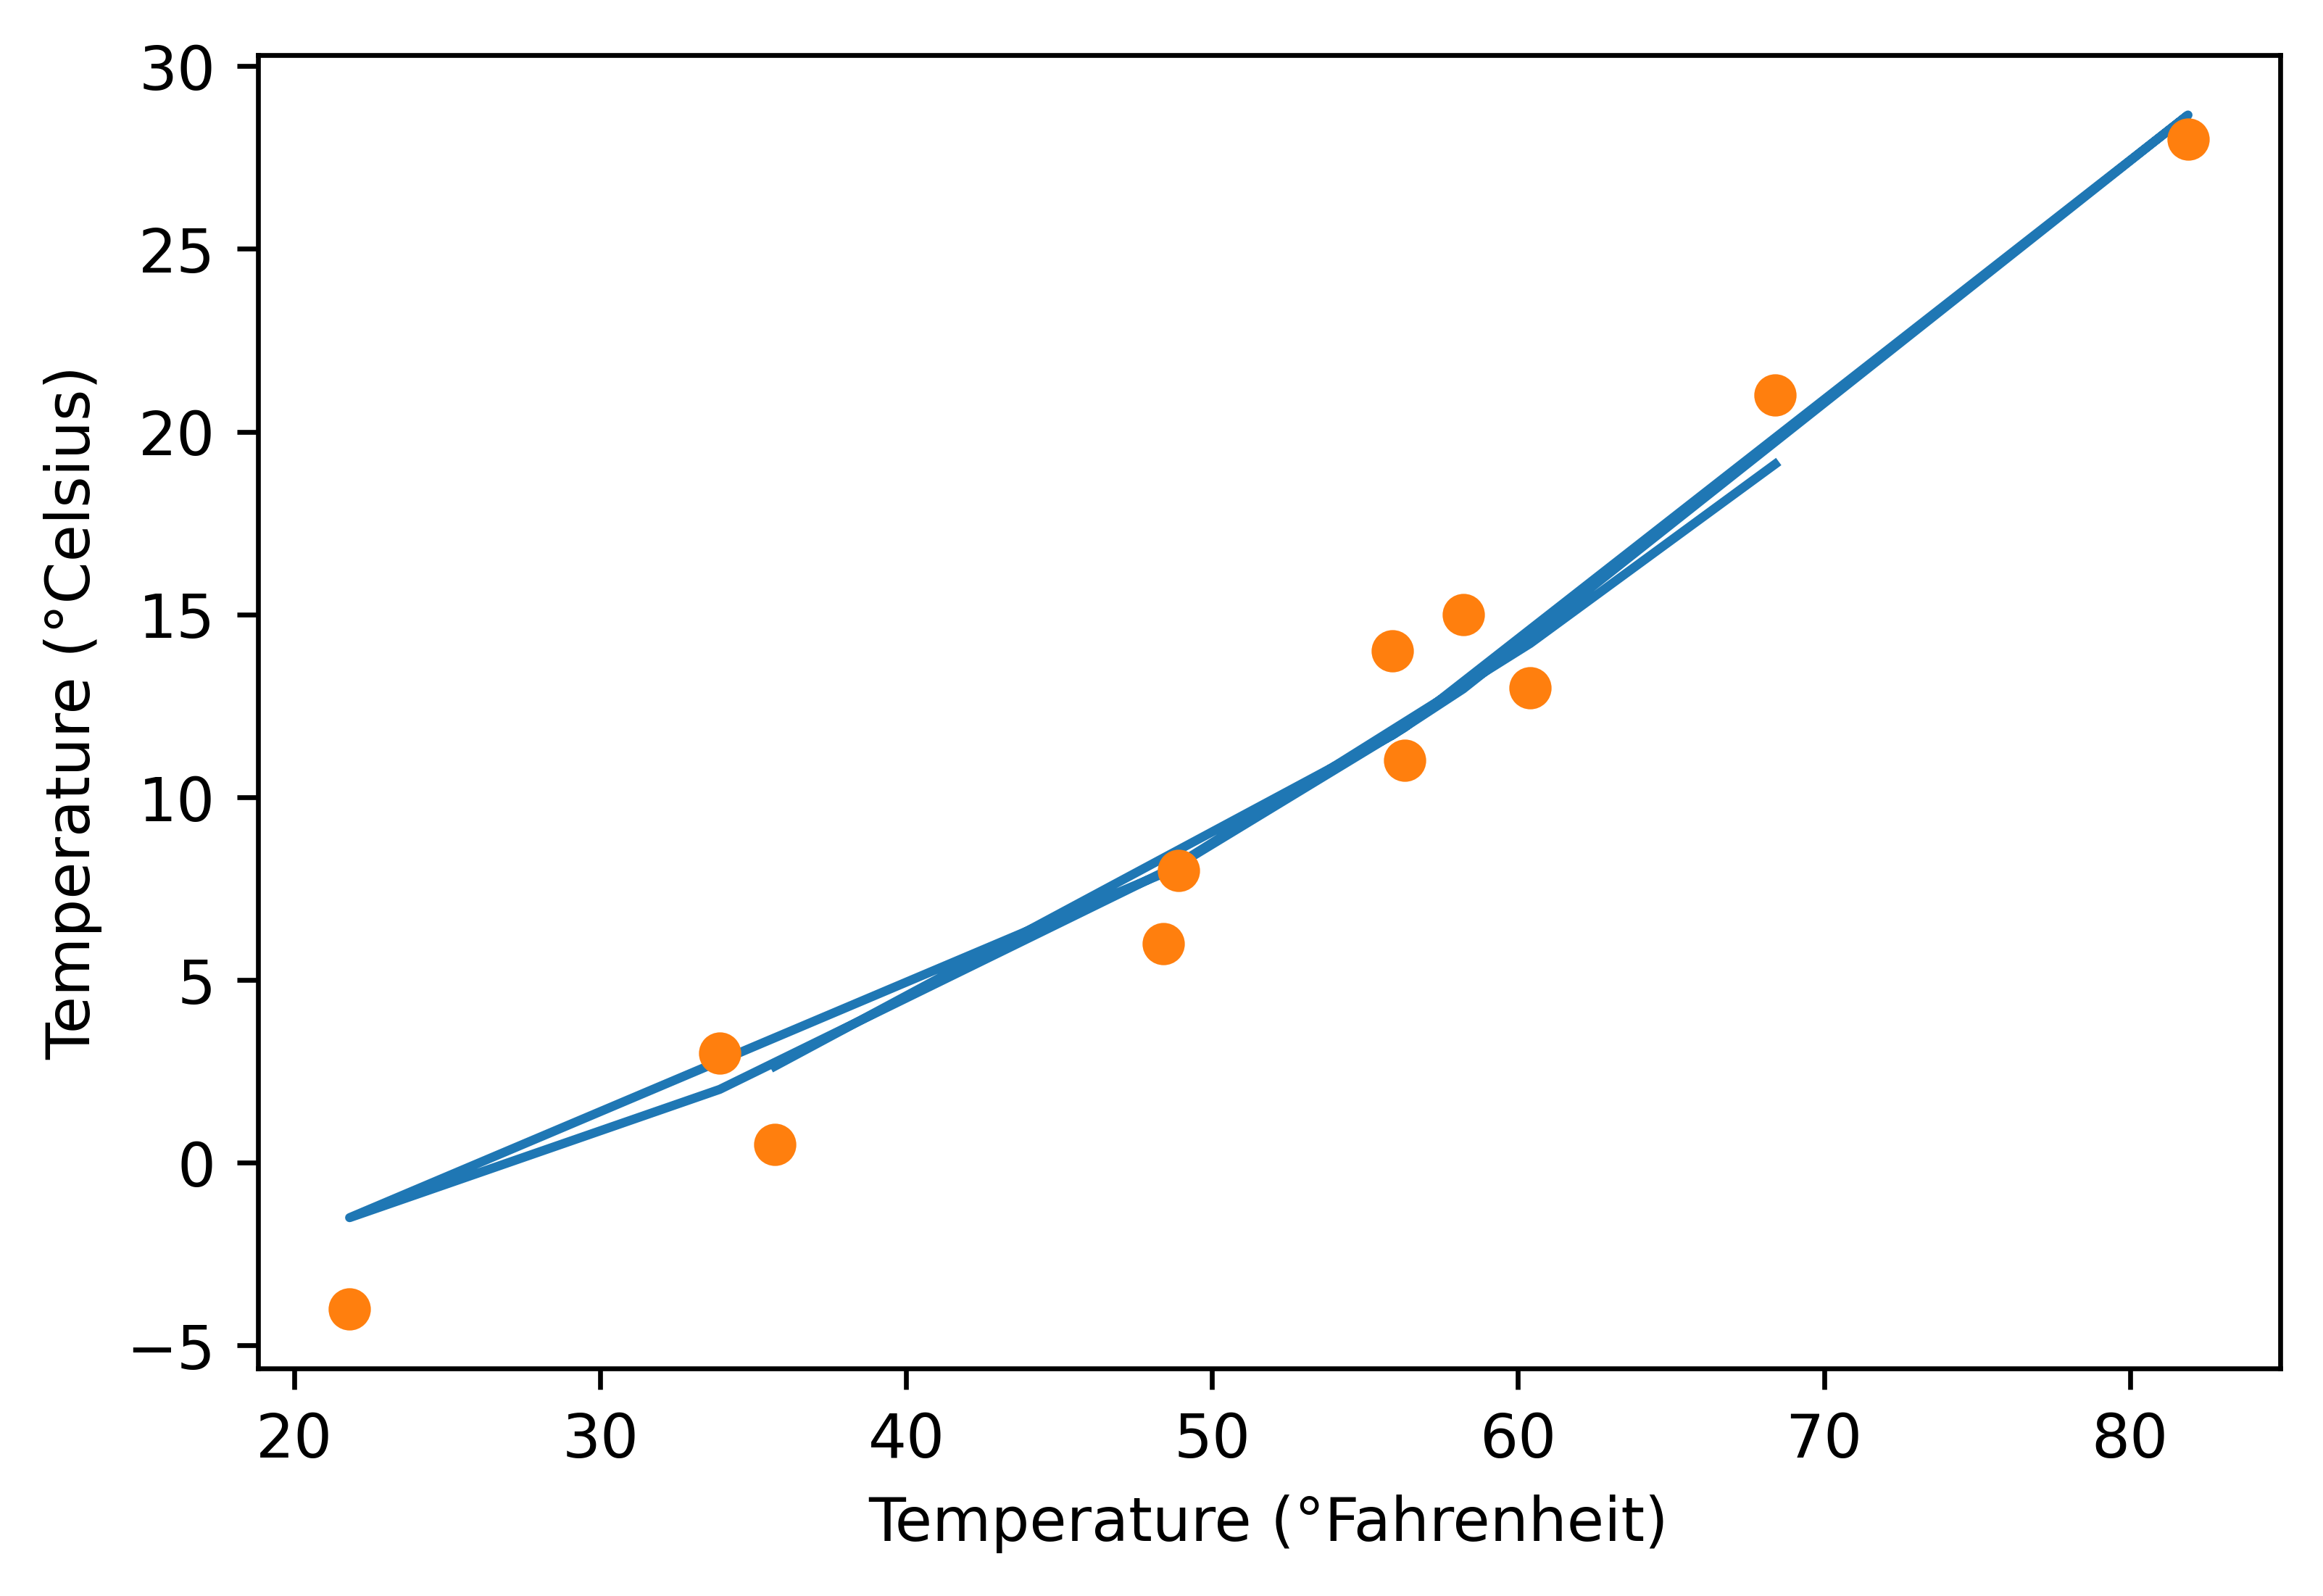

In [198]:
t_p3 = model(t_un, *paras3)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p3.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [199]:
  paras4 = training_loop(
  n_epochs = 5000,
  learning_rate = 1e-4,
  params = torch.tensor([1.0, 1.0, 0.0]),
  t_u = t_un,
  t_c = t_c)

Epoch 500, Loss 9.678580
Epoch 1000, Loss 9.474418
Epoch 1500, Loss 9.275946
Epoch 2000, Loss 9.082996
Epoch 2500, Loss 8.895410
Epoch 3000, Loss 8.713042
Epoch 3500, Loss 8.535755
Epoch 4000, Loss 8.363424
Epoch 4500, Loss 8.195878
Epoch 5000, Loss 8.033002


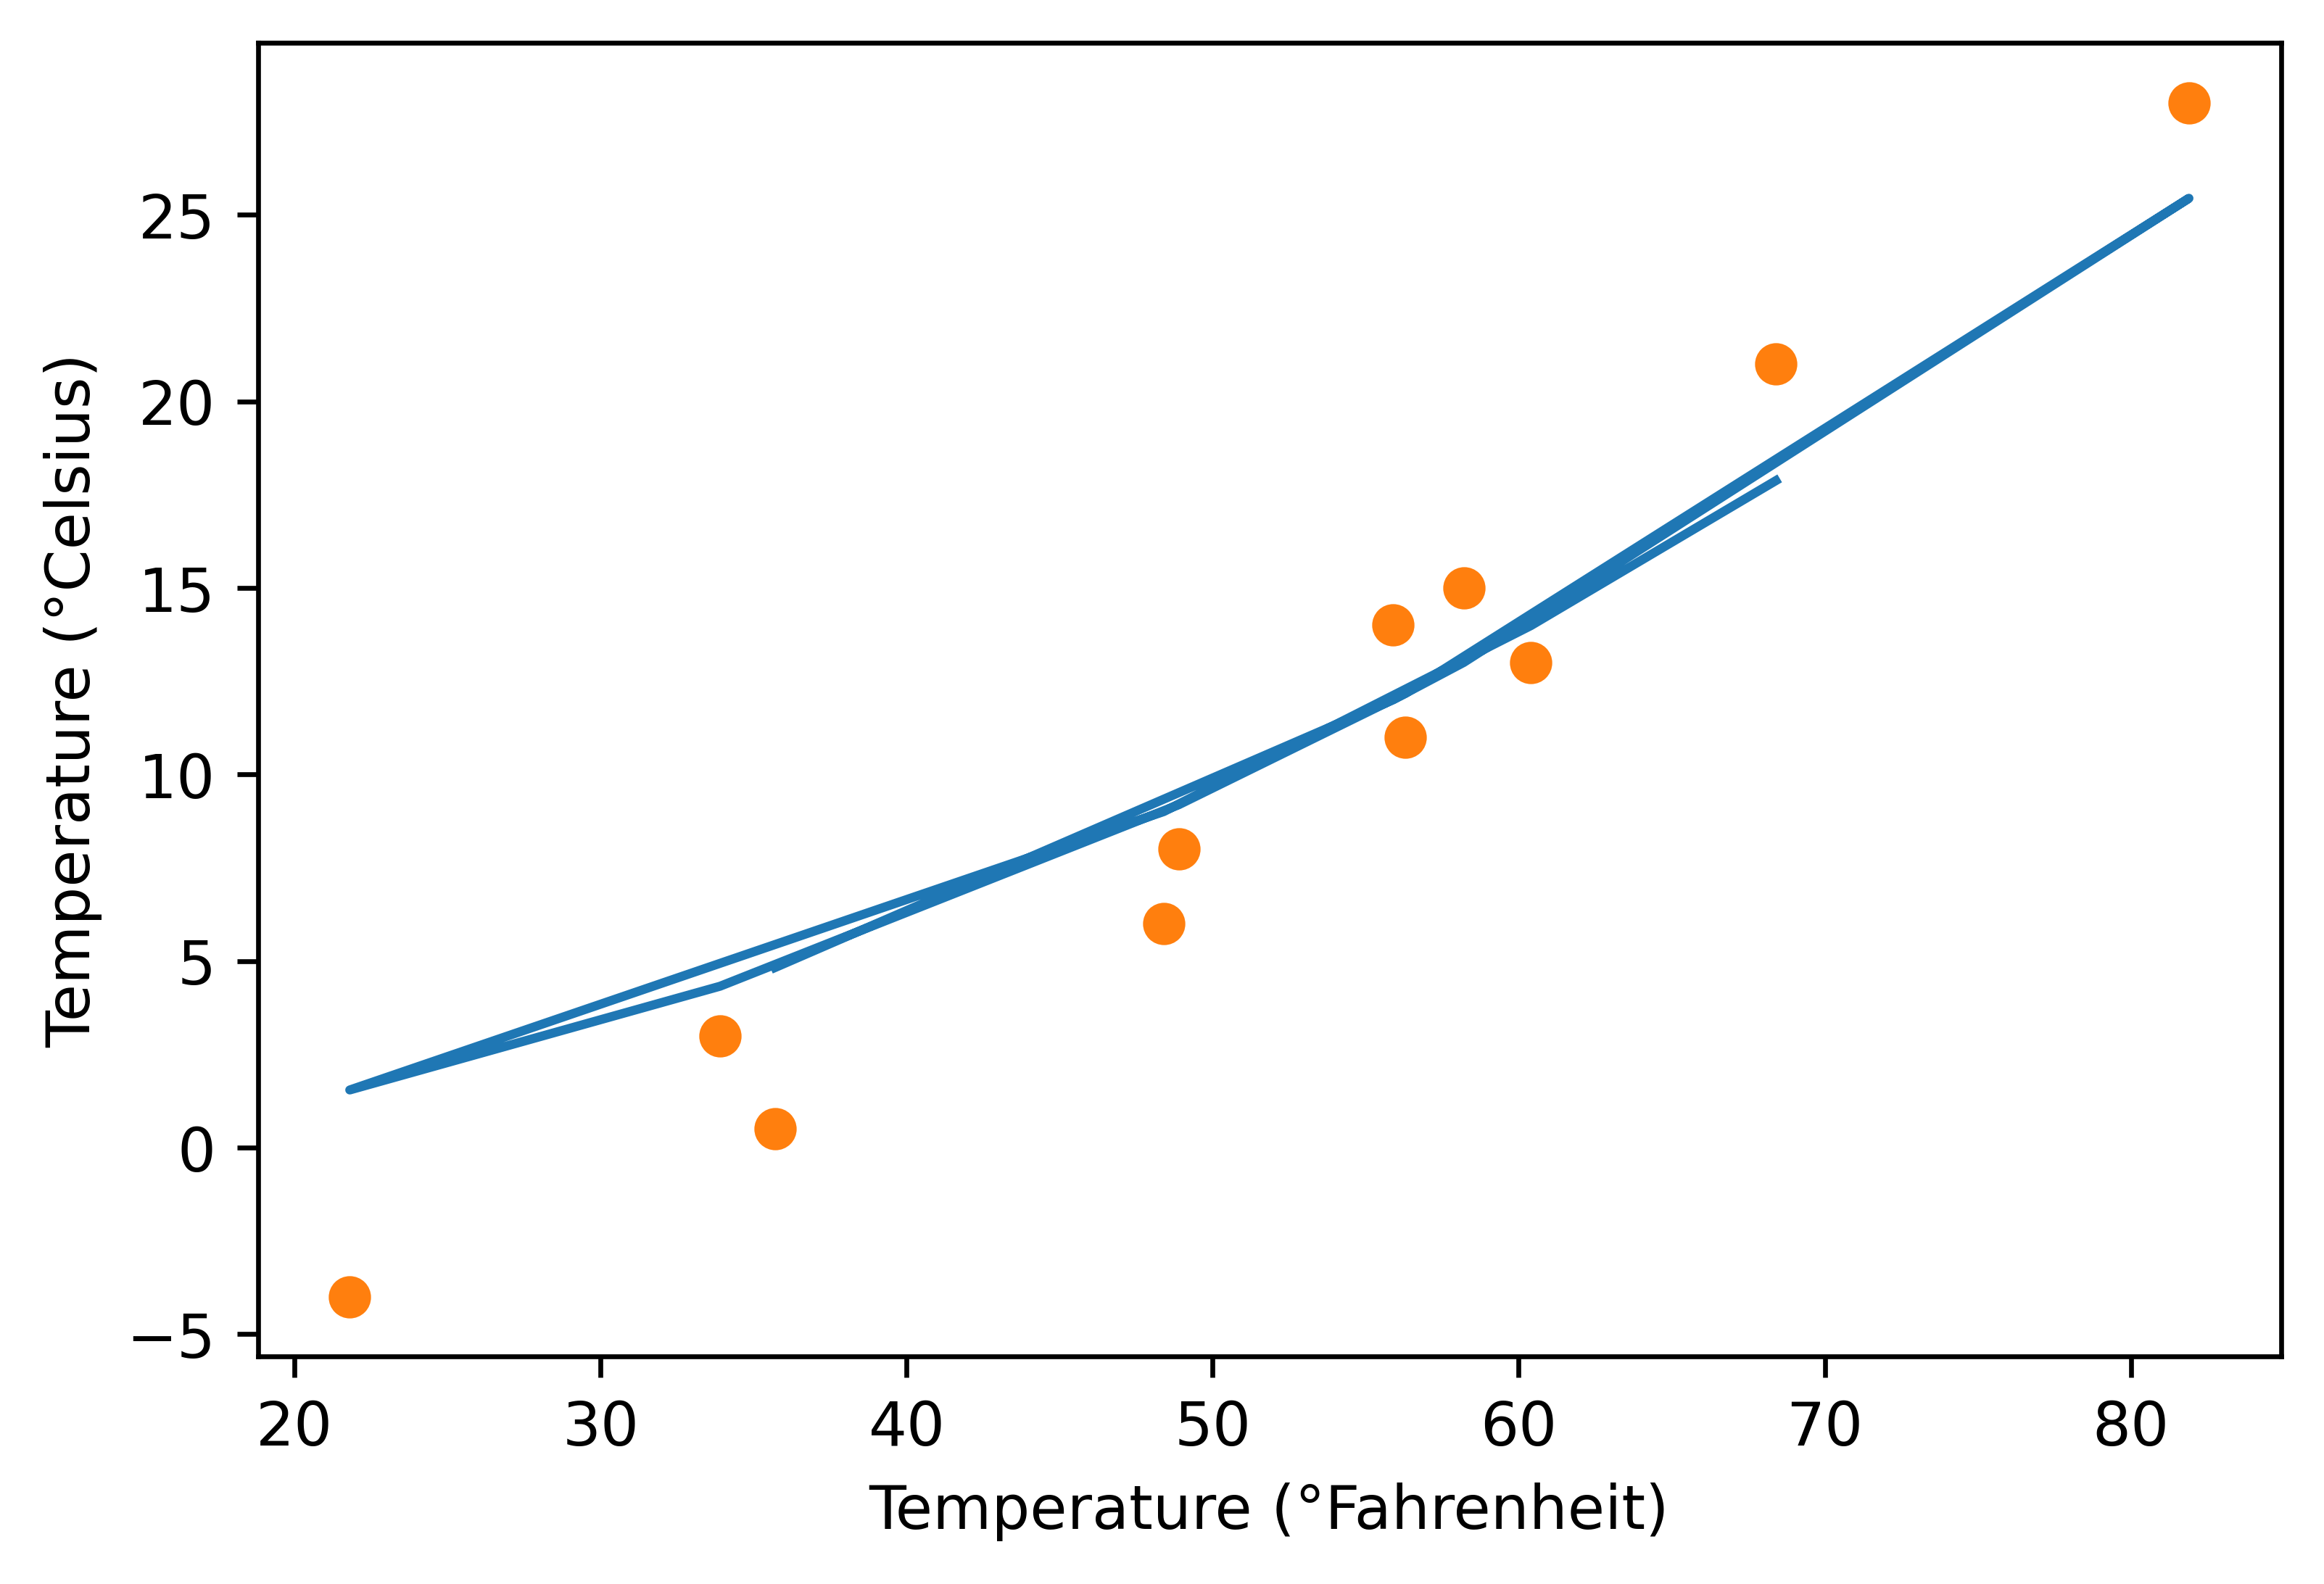

In [200]:
t_p4 = model(t_un, *paras4)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p4.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [201]:


t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
def model(t_u, w, b):
  return w * t_u + b
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()
w = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w, b)
t_p
loss = loss_fn(t_p, t_c)
loss
delta = 0.1
loss_rate_of_change_w = \
(loss_fn(model(t_u, w + delta, b), t_c) -
loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)
learning_rate = 1e-2
w=w- learning_rate * loss_rate_of_change_w
loss_rate_of_change_b = \
(loss_fn(model(t_u, w, b + delta), t_c) -
loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)
b=b- learning_rate * loss_rate_of_change_b
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()
def dloss_fn(t_p, t_c):
  dsq_diffs=2* (t_p - t_c) / t_p.size(0)
  return dsq_diffs
def dmodel_dw(t_u, w, b):
  return t_u
def dmodel_db(t_u, w, b):
  return 1.0
def grad_fn(t_u, t_c, t_p, w, b):
  dloss_dtp = dloss_fn(t_p, t_c)
  dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
  dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
  return torch.stack([dloss_dw.sum(), dloss_db.sum()])
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    w, b = params
    t_p = model(t_u, w, b)
    loss = loss_fn(t_p, t_c)
    grad = grad_fn(t_u, t_c, t_p, w, b)
    params = params - learning_rate * grad
    if(epoch % 500 == 0):
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
  return params
t_un = 0.1 * t_u

paral = training_loop(
n_epochs = 5000,
learning_rate = 1e-3,
params = torch.tensor([1.0, 0.0]),
t_u = t_un,
t_c = t_c)
paral

Epoch 500, Loss 25.644270
Epoch 1000, Loss 22.094957
Epoch 1500, Loss 19.100206
Epoch 2000, Loss 16.573353
Epoch 2500, Loss 14.441303
Epoch 3000, Loss 12.642381
Epoch 3500, Loss 11.124518
Epoch 4000, Loss 9.843812
Epoch 4500, Loss 8.763214
Epoch 5000, Loss 7.851448


tensor([ 4.0435, -9.8084])

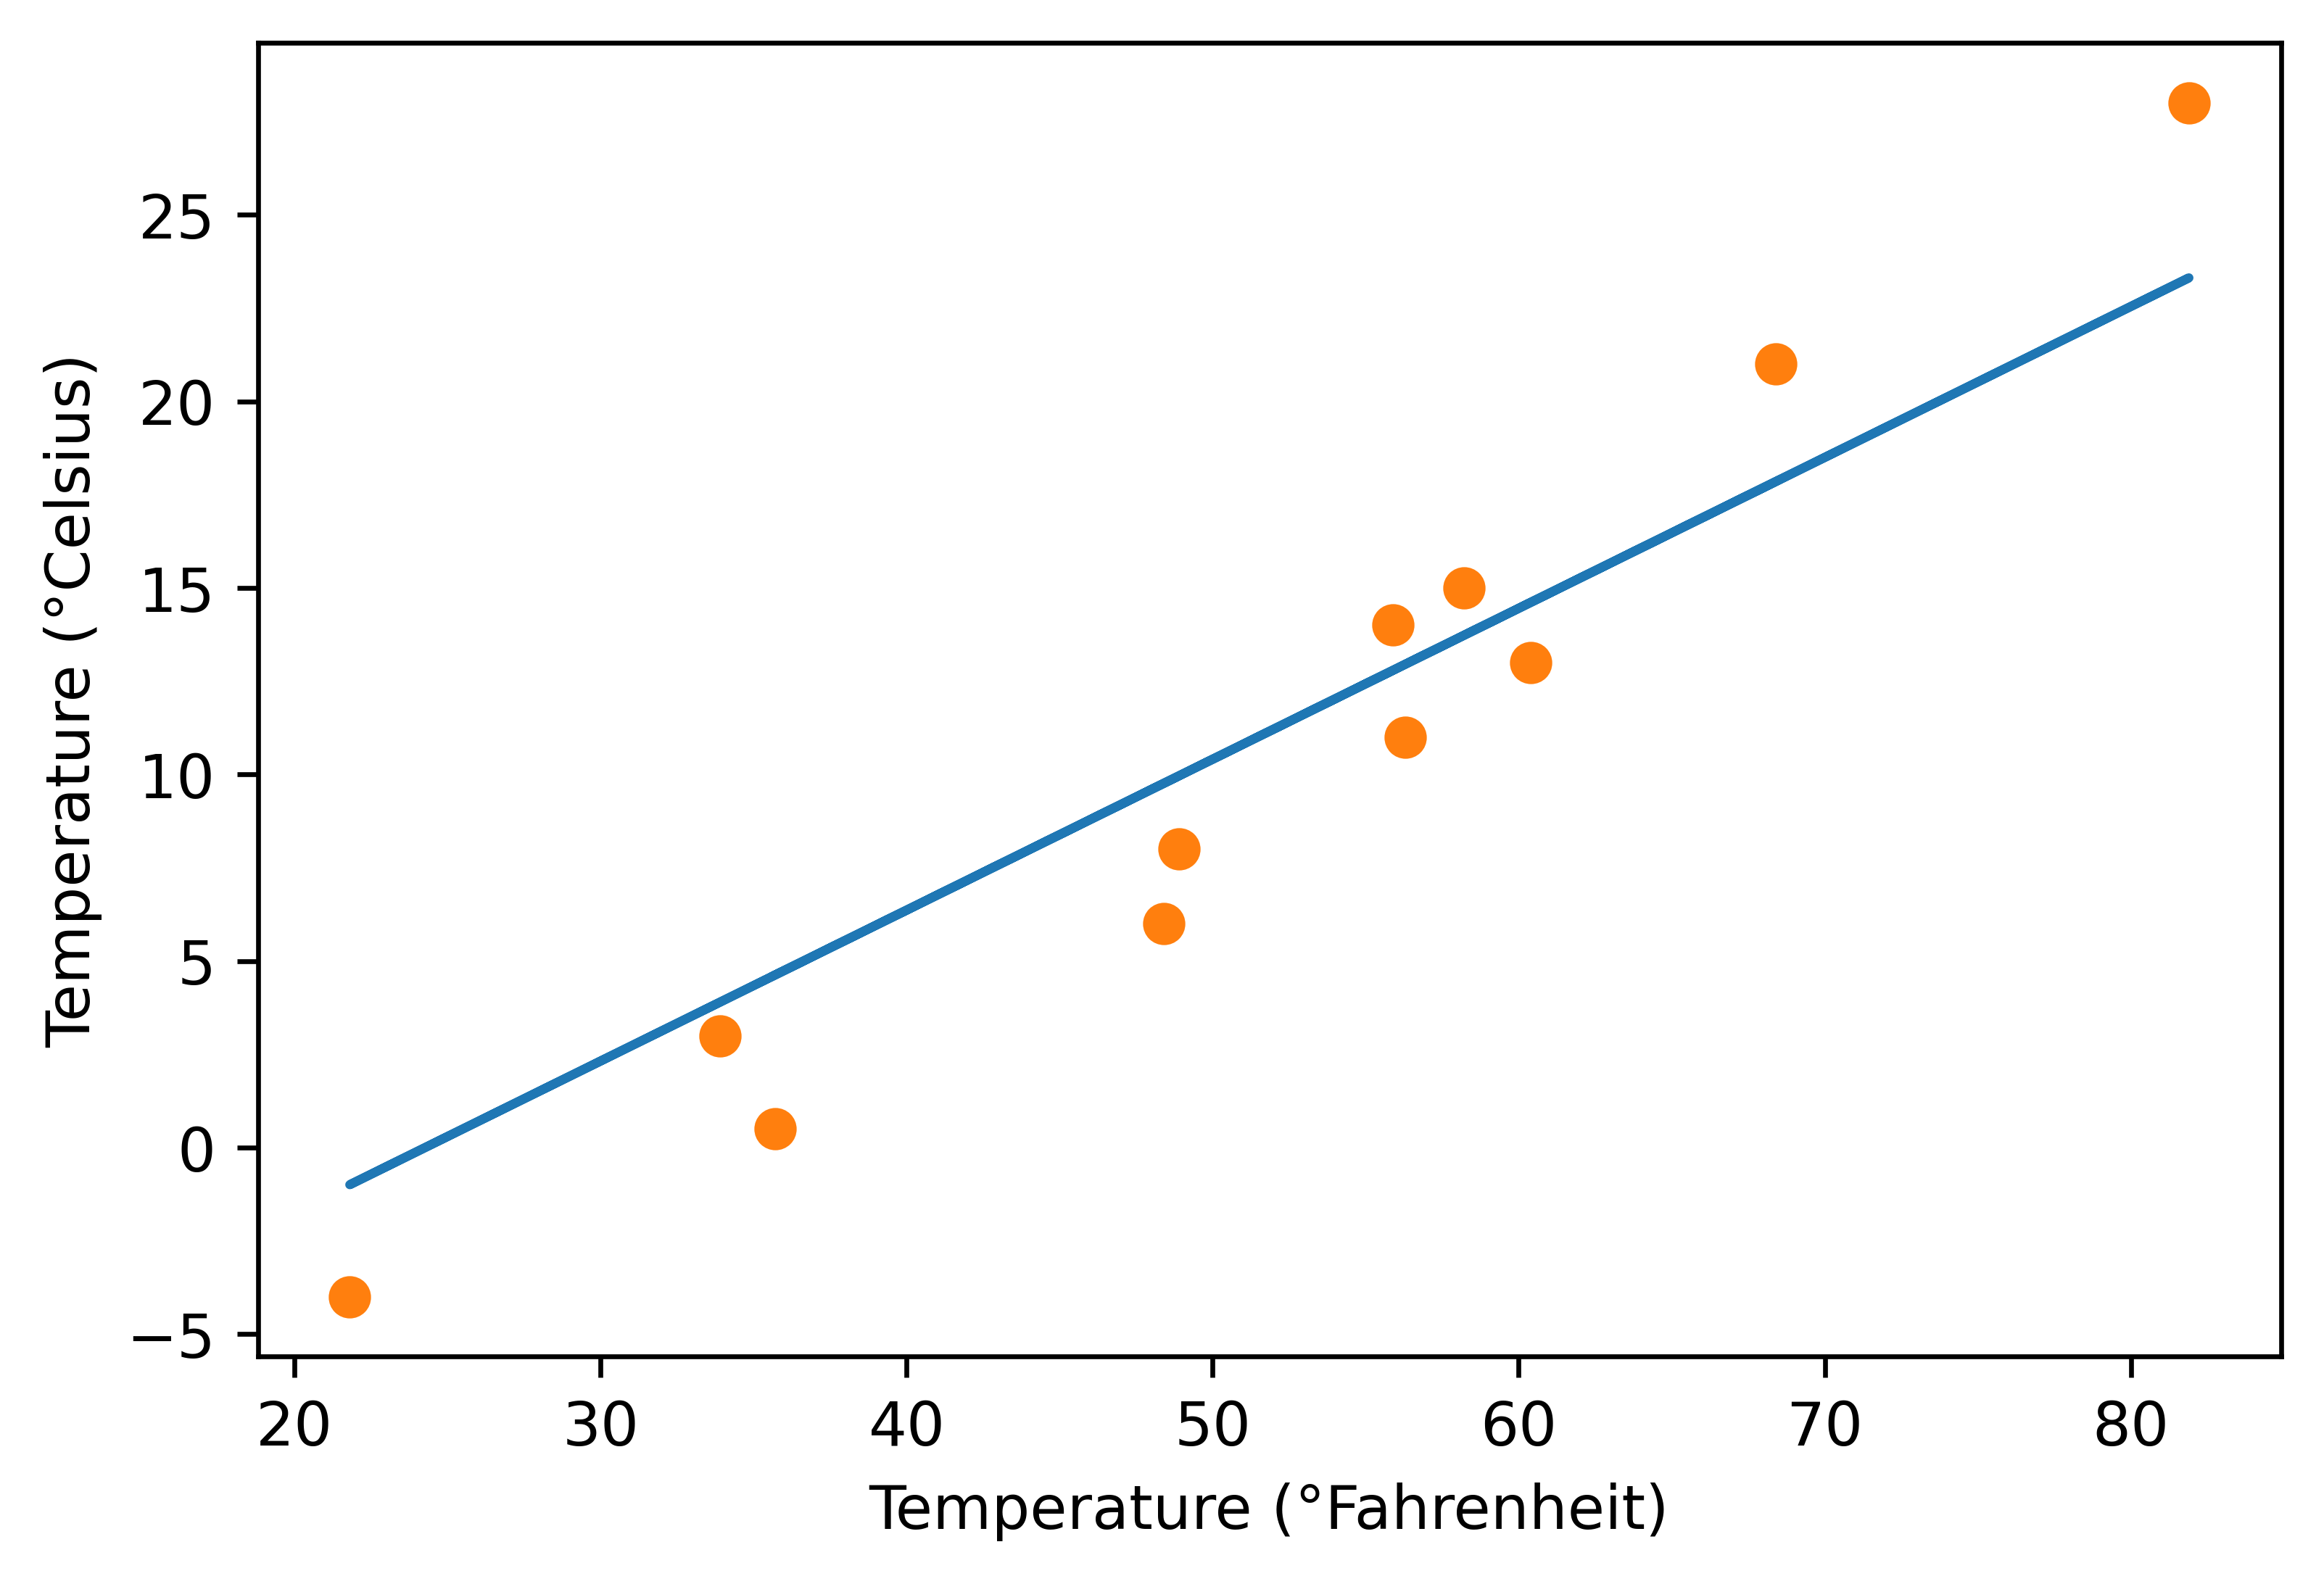

In [202]:
t_pl = model(t_un, *paral)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_pl.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [203]:
import pandas as pd

housing = pd.DataFrame(pd.read_csv("drive/MyDrive/images/Housing.csv")) 
housing.head() 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [204]:
m = len(housing) 
m 

545

In [205]:
housing.shape

(545, 13)

In [208]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'] 
Newtrain = housing[num_vars] 
Newtrain.head() 

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [207]:
Newtrain.shape

(545, 6)

In [211]:
data = Newtrain.to_csv(index=False)
data

'area,bedrooms,bathrooms,stories,parking,price\n7420,4,2,3,2,13300000\n8960,4,4,4,3,12250000\n9960,3,2,2,2,12250000\n7500,4,2,2,3,12215000\n7420,4,1,2,2,11410000\n7500,3,3,1,2,10850000\n8580,4,3,4,2,10150000\n16200,5,3,2,0,10150000\n8100,4,1,2,2,9870000\n5750,3,2,4,1,9800000\n13200,3,1,2,2,9800000\n6000,4,3,2,2,9681000\n6550,4,2,2,1,9310000\n3500,4,2,2,2,9240000\n7800,3,2,2,0,9240000\n6000,4,1,2,2,9100000\n6600,4,2,2,1,9100000\n8500,3,2,4,2,8960000\n4600,3,2,2,2,8890000\n6420,3,2,2,1,8855000\n4320,3,1,2,2,8750000\n7155,3,2,1,2,8680000\n8050,3,1,1,1,8645000\n4560,3,2,2,1,8645000\n8800,3,2,2,2,8575000\n6540,4,2,2,2,8540000\n6000,3,2,4,0,8463000\n8875,3,1,1,1,8400000\n7950,5,2,2,2,8400000\n5500,4,2,2,1,8400000\n7475,3,2,4,2,8400000\n7000,3,1,4,2,8400000\n4880,4,2,2,1,8295000\n5960,3,3,2,1,8190000\n6840,5,1,2,1,8120000\n7000,3,2,4,2,8080940\n7482,3,2,3,1,8043000\n9000,4,2,4,2,7980000\n6000,3,1,4,2,7962500\n6000,4,2,4,1,7910000\n6550,3,1,2,0,7875000\n6360,3,2,4,0,7840000\n6480,3,2,4,2,77000

In [230]:
from pathlib import Path  
filepath = Path('drive/MyDrive/images/out.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
Newtrain.to_csv(filepath)  

In [236]:
import csv
import numpy as np

house_path = "drive/MyDrive/images/out.csv"
houseq_numpy = np.loadtxt(house_path, dtype=np.float, delimiter=",",
skiprows=1)
houseq_numpy

array([[0.000e+00, 7.420e+03, 4.000e+00, ..., 3.000e+00, 2.000e+00,
        1.330e+07],
       [1.000e+00, 8.960e+03, 4.000e+00, ..., 4.000e+00, 3.000e+00,
        1.225e+07],
       [2.000e+00, 9.960e+03, 3.000e+00, ..., 2.000e+00, 2.000e+00,
        1.225e+07],
       ...,
       [5.420e+02, 3.620e+03, 2.000e+00, ..., 1.000e+00, 0.000e+00,
        1.750e+06],
       [5.430e+02, 2.910e+03, 3.000e+00, ..., 1.000e+00, 0.000e+00,
        1.750e+06],
       [5.440e+02, 3.850e+03, 3.000e+00, ..., 2.000e+00, 0.000e+00,
        1.750e+06]])

In [278]:
data2 = torch.from_numpy(houseq_numpy)
data2
x_data = data2[:, 1:8].t()
x_data
x_data = torch.transpose(x_data, 0, 1)


In [279]:
x_data

tensor([[7.4200e+03, 4.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00, 1.3300e+07],
        [8.9600e+03, 4.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00, 1.2250e+07],
        [9.9600e+03, 3.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 1.2250e+07],
        ...,
        [3.6200e+03, 2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.7500e+06],
        [2.9100e+03, 3.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.7500e+06],
        [3.8500e+03, 3.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 1.7500e+06]],
       dtype=torch.float64)

In [280]:
x_data.size()

torch.Size([545, 6])

In [267]:
x_data = torch.transpose(x_data, 0, 1)
x_data

tensor([[7.4200e+03, 4.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00],
        [8.9600e+03, 4.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00],
        [9.9600e+03, 3.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00],
        ...,
        [3.6200e+03, 2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00],
        [2.9100e+03, 3.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00],
        [3.8500e+03, 3.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00]],
       dtype=torch.float64)

In [282]:
data2 = x_data[:, :-1]
data2

tensor([[7.4200e+03, 4.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00],
        [8.9600e+03, 4.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00],
        [9.9600e+03, 3.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00],
        ...,
        [3.6200e+03, 2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00],
        [2.9100e+03, 3.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00],
        [3.8500e+03, 3.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00]],
       dtype=torch.float64)

In [283]:
data2.shape

torch.Size([545, 5])

In [284]:
target = x_data[:, -1]
target, target.shape

(tensor([13300000., 12250000., 12250000., 12215000., 11410000., 10850000.,
         10150000., 10150000.,  9870000.,  9800000.,  9800000.,  9681000.,
          9310000.,  9240000.,  9240000.,  9100000.,  9100000.,  8960000.,
          8890000.,  8855000.,  8750000.,  8680000.,  8645000.,  8645000.,
          8575000.,  8540000.,  8463000.,  8400000.,  8400000.,  8400000.,
          8400000.,  8400000.,  8295000.,  8190000.,  8120000.,  8080940.,
          8043000.,  7980000.,  7962500.,  7910000.,  7875000.,  7840000.,
          7700000.,  7700000.,  7560000.,  7560000.,  7525000.,  7490000.,
          7455000.,  7420000.,  7420000.,  7420000.,  7350000.,  7350000.,
          7350000.,  7350000.,  7343000.,  7245000.,  7210000.,  7210000.,
          7140000.,  7070000.,  7070000.,  7035000.,  7000000.,  6930000.,
          6930000.,  6895000.,  6860000.,  6790000.,  6790000.,  6755000.,
          6720000.,  6685000.,  6650000.,  6650000.,  6650000.,  6650000.,
          6650000.,  6650

In [285]:
data_mean = torch.mean(data2, dim=0)
data_mean

tensor([5.1505e+03, 2.9651e+00, 1.2862e+00, 1.8055e+00, 6.9358e-01],
       dtype=torch.float64)

In [286]:
data_var = torch.var(data2, dim=0)
data_var

tensor([4.7095e+06, 5.4474e-01, 2.5248e-01, 7.5254e-01, 7.4233e-01],
       dtype=torch.float64)

In [287]:
data_normalized = (data2 - data_mean) / torch.sqrt(data_var)
data_normalized


tensor([[ 1.0458,  1.4021,  1.4205,  1.3770,  1.5163],
        [ 1.7554,  1.4021,  5.4008,  2.5297,  2.6770],
        [ 2.2162,  0.0472,  1.4205,  0.2242,  1.5163],
        ...,
        [-0.7053, -1.3077, -0.5697, -0.9285, -0.8050],
        [-1.0324,  0.0472, -0.5697, -0.9285, -0.8050],
        [-0.5993,  0.0472, -0.5697,  0.2242, -0.8050]], dtype=torch.float64)

In [ ]:
data_normalized
target
def model(b, x1, w1, x2, w2, x3, w3, x4, w4, x5, w5,):
  return w5*x5 + w4*x4 + w3*x3 + w2*x2 + w1*x1 + b
def loss_fn(t_1, t_2,t_3,t_4,t_5,t_t):
squared_diffs = (t_p - t_c)**2
return squared_diffs.mean()